**Задание 4.**

<h5> Часть 1. Задача для уравнения Гельмгольца в круге.

Рассматривается краевая задача в круге: 
$$  \left( 1 \right)
    \begin{cases}
        -\Delta u + \alpha u = f(x, y), 0 < x^2 + y^2 < R^2,\\  
        u|_{\partial {\Omega}, x < 0} = h(x, y),\\
        \frac{\partial u}{\partial n} |_{\partial {\Omega}, x > 0} = g(x, y)  
        
    \end{cases}
$$  
где
$$ 
    \Omega = \left\{ \left( {x, y} \right): 0 < x^2 + y^2 < R^2 \right\} 
$$,  
$$
    \partial{\Omega} = \left\{ \left( {x, y} \right): x^2 + y^2 = R^2 \right\}
$$,  
$$
    \partial{\Omega} = \partial{\Omega_1} + \partial{\Omega_2} = \partial{\Omega}|_{x > 0} + \partial{\Omega}|_{x < 0}
$$, 

**Сведение поставленной краевой задачи к вариационной задаче.**  

Вводится пространство скалярных пробных функций: $$ U = \left\{ u \in H^1(\Omega): u|_{\partial {\Omega}, x < 0} = h(x, y),
        \frac{\partial u}{\partial n} |_{\partial {\Omega}, x > 0} = g(x, y) \right\}$$
и пространство скалярных тестовых функций $$ V = \left\{ v \in {\stackrel{0}{H^1}}(\Omega): v|_{\partial{\Omega_2}} = 0    \right\}$$

Исходное уравнение скалярно умножается на тестовую функцию в обобщенном виде:  
$$-\int_{\Omega} \Delta u v dx + \alpha \int_{\Omega} uvdx = \int_{\Omega} f v dx$$  
Преобразуем первый интеграл с помощью "интегрирования по частям", а затем применим формулу Остроградского-Гаусса:  
$$ -\int_{\Omega} \Delta u v dx = -\int_{\Omega} div \: grad u \: \cdot v dx = -\int_{\Omega} div \left[ v \cdot grad u \right] dx + \int_{\Omega} grad u \cdot grad v dx = $$  
$$ = \left\{ \text{Г-О} \right\} = -\int_{\partial{\Omega}} \left( v \: gradu, \vec n(x) \right) ds + \int_{\Omega} grad u \cdot grad v dx$$  

Таким образом, получаем вариационную постановку задачи:  
$$ a(u, v)  = l(v), v \in V \\
a(u, v) =  \int_{\Omega} \nabla u \cdot \nabla v dx + \alpha \int_{\Omega} uvdx\\  
l(v) = \int_{\Omega} f v dx + \int_{\partial{\Omega_1}} g v ds$$

Далее будем работать в полярных координатах, сделав замену
$$ \begin{cases}
    x = r cos \phi,\\
    y = r sin \phi,\\
\end{cases}$$  
Тогда постановка исходной задачи примет вид:  
$$  \begin{cases}
        -\Delta u + \alpha u = f(r, \phi), 0 < r < R^2, \phi \in  	\left[ 0, 2 \pi\right)\\  
        u|_{r = R} = h(\phi), \phi \in \left[ \frac {\pi}{2}, \frac{3 \pi}{2}\right),\\
        \frac{\partial u}{\partial n} |_{r = R} = g(\phi),  \phi \in \left[ 0, \frac{\pi}{2}\right) \cup\left[ \frac {3 \pi}{2}, 2 \pi\right)
        
    \end{cases}
$$ 

**Решение вариационной задачи с помощью пакета FeniCS.** 

Будем рассматривать задачу в единичном круге с центром в начале координат. Для дискретизации уравнения вариационной задачи необходимо ввести конечно-элементное функциональное пространство. Пусть $V_h = \left\{ v^h\left(r, \phi \right) \in C(\overline{\Omega}): v^h|_{e^i} = P_2(e^i) \right\}$

In [1]:
# Позволяет использовать измененные модули без перезагрузки ядра
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import fenics
import mshr
import dolfin
import math

#Инициализация выражений и параметров
r = fenics.Expression("sqrt(x[0] * x[0] + x[1] * x[1])", degree = 2)
phi = fenics.Expression("atan2(x[1], x[0])", degree = 2) #угол в радианах
center_point = fenics.Point(0, 0)
R = 1

#Триангуляция области
circle = mshr.Circle(center_point, R)
mesh = mshr.generate_mesh(circle, 50)

# Функциональное пространство конечных элементов(скалярное)
function_space = dolfin.FunctionSpace(mesh, 'P', 2) #P = polinom, 2 - степень полинома
alpha = fenics.Constant(1)

Для проверки точности решения с помощью пакета FeniCS возьмем три пробных задачи. Построим три функции аналитического решения, далее по ним найдем функции $h(\phi), g(\phi)$, задающие краевые условия, и неоднороности уравнения $f(r, \phi)$.
$$  \left(\text{test 1} \right)        
    \begin{cases}
        u_{sol}(r, \phi) = r^2 {cos}^2 \phi + 3 r^2 {sin}^2 \phi\\
        f(r, \phi) = -8 + r^2 {cos}^2 \phi + 3 r^2 {sin}^2 \phi\\
        h(\phi) = R^2 \left[ {cos}^2\phi + 3 {sin}^2 \phi\right], \phi \in  \left[ \frac {\pi}{2}, \frac{3 \pi}{2}\right)\\
        g(\phi) = 2R \left[ {cos}^2\phi + 3 {sin}^2 \phi\right], \phi \in \left[ 0, \frac{\pi}{2}\right) \cup\left[ \frac {3 \pi}{2}, 2 \pi\right)\\
    \end{cases}
$$ 
$$  \left( \text{test 2} \right)        
    \begin{cases}
        u_{sol}(r, \phi) = r cos \phi - r^2 {sin}^2 \phi + e^{-r\: cos\phi}\\
        f(r, \phi) = 2 + r cos \phi - r^2 {sin}^2 \phi \\
        h(\phi) = R cos \phi - R^2 {sin}^2 \phi + e^{-R \: cos\phi}, \phi \in  \left[ \frac {\pi}{2}, \frac{3 \pi}{2}\right)\\
        g(\phi) = cos \phi - 2R {sin}^2 \phi - e^{-R \: cos\phi}, \phi \in \left[ 0, \frac{\pi}{2}\right) \cup\left[ \frac {3 \pi}{2}, 2 \pi\right)\\
    \end{cases}
$$ 
$$  	\left( \text{test 3} \right)        
    \begin{cases}
        u_{sol}(r, \phi) = r^2 cos \phi sin \phi + e^{r^2\: cos \phi\: sin \phi}\\
        f(r, \phi) = \left( 1 - r^2 \right) e^{r^2\: cos \phi\: sin \phi} + r^2\: cos \phi\: sin \phi\\
        h(\phi) = R^2 cos \phi sin \phi + e^{R^2 \: cos \phi \: sin \phi}, \phi \in  \left[ \frac {\pi}{2}, \frac{3 \pi}{2}\right)\\
        g(\phi) = 2R\: cos \phi \: sin \phi \left[ 1 + e^{R^2 \: cos \phi \: sin \phi}\right], \phi \in \left[ 0, \frac{\pi}{2}\right) \cup\left[ \frac {3 \pi}{2}, 2 \pi\right)\\
    \end{cases}
$$ 

In [3]:
#Инициализация данных для трех тестовых задач. R = 1
u_exact1 = fenics.Expression("r * r * cos(phi) * cos(phi) + 3 * r * r * sin(phi) * sin(phi)", r = r, phi = phi, degree = 2)
f1 = fenics.Expression("-8 + r * r * cos(phi) * cos(phi) + 3 * r * r * sin(phi) * sin(phi) ", r = r, phi = phi, degree = 2)
h1 = fenics.Expression("cos(phi) * cos(phi) + 3 * sin(phi) * sin(phi)", phi = phi, degree = 2)
g1 = fenics.Expression("2 * (cos(phi) * cos(phi) + 3 * sin(phi) * sin(phi))", phi = phi, degree = 2)

u_exact2 = fenics.Expression("r * cos(phi) - r * r * sin(phi) * sin(phi) + exp(-(r * cos(phi)))", r = r, phi = phi, degree = 2)
f2 = fenics.Expression("2 + r * cos(phi) - r * r * sin(phi) * sin(phi)", r = r, phi = phi, degree = 2)
h2 = fenics.Expression("cos(phi) - sin(phi) * sin(phi) +  exp(-cos(phi))", phi = phi, degree = 2)
g2 = fenics.Expression("cos(phi) - 2 * sin(phi) * sin(phi) -  exp(- cos(phi))", phi = phi, degree = 2)


u_exact3 = fenics.Expression("r * r * sin(phi) * cos(phi) + exp(r * r * cos(phi) * sin(phi))", r = r, phi = phi, degree = 2)
f3 = fenics.Expression("(1 - r * r) * exp(r * r * cos(phi) * sin(phi)) + r * r * cos(phi) * sin(phi)", r = r, phi = phi, degree = 2)
h3 = fenics.Expression("sin(phi) * cos(phi) + exp(cos(phi) * sin(phi))", phi = phi, degree = 2)
g3 = fenics.Expression("2 * sin(phi) * cos(phi) * (1.0 + exp(cos(phi) * sin(phi)))", phi = phi, degree = 2)

In [4]:
from func_lib.fenics_solver import fenics_solution
num_sol1 = fenics_solution(function_space, alpha, f1, h1, g1)
num_sol2 = fenics_solution(function_space, alpha, f2, h2, g2)
num_sol3 = fenics_solution(function_space, alpha, f3, h3, g3)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


Численные решения трех тестовых задач получены. Оценим отклонение точного аналитического решения от полученного численно по максимум-норме и норме простравнства $L_2$.

In [5]:
from func_lib.get_errors import get_errors
l2_error, max_error = get_errors(u_exact1, num_sol1, mesh)
print("Тест 1:")
print("     L2 error =", l2_error)
print("     MAX error =", max_error)

l2_error, max_error = get_errors(u_exact2, num_sol2, mesh)
print("Тест 2:")
print("     L2 error =", l2_error)
print("     MAX error =", max_error)

l2_error, max_error = get_errors(u_exact3, num_sol3, mesh)
print("Тест 3:")
print("     L2 error =", l2_error)
print("     MAX error =", max_error)

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Тест 1:
     L2 error = 0.0008750300413671778
     MAX error = 0.001200977158202221
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Тест 2:
     L2 error = 0.00018414648692624487
     MAX error = 0.00040029222339876824
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Тест 3:
     L2 error = 0.00020869361753521066
     MAX error = 0.0005301431840725179


Ниже приведены три пары графиков решений для трех тестовых задач. Каждая пара состоит из точного решения, построенного аналитически, и приближенного, полученнного численно с помощью пакета FeniCS.

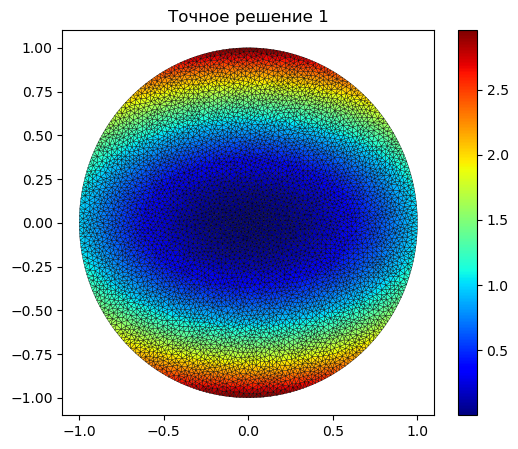

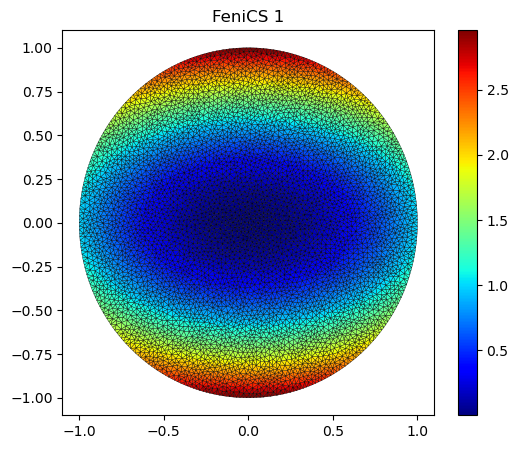

In [6]:
from func_lib.plots import plot_sol
plot_sol(mesh, u_exact1, "Точное решение 1")
plot_sol(mesh, num_sol1, "FeniCS 1")

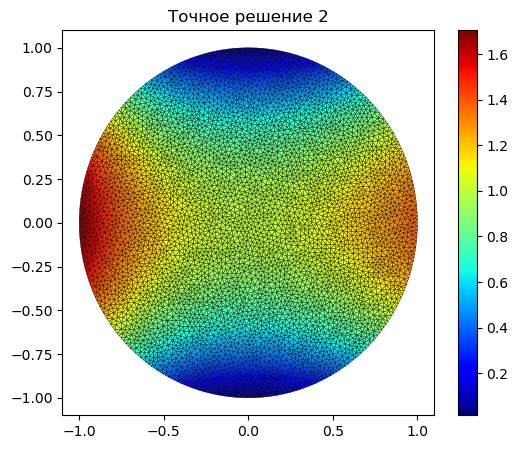

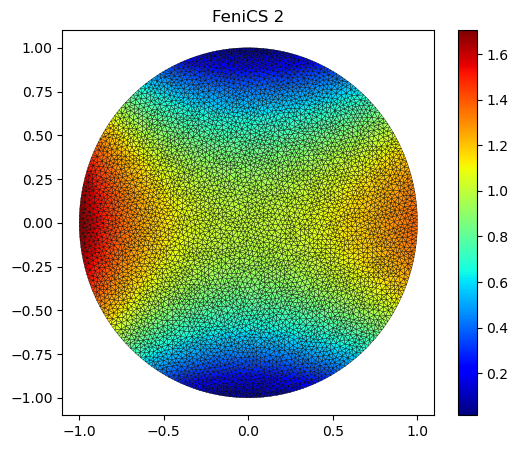

In [7]:
plot_sol(mesh, u_exact2, "Точное решение 2")
plot_sol(mesh, num_sol2, "FeniCS 2")

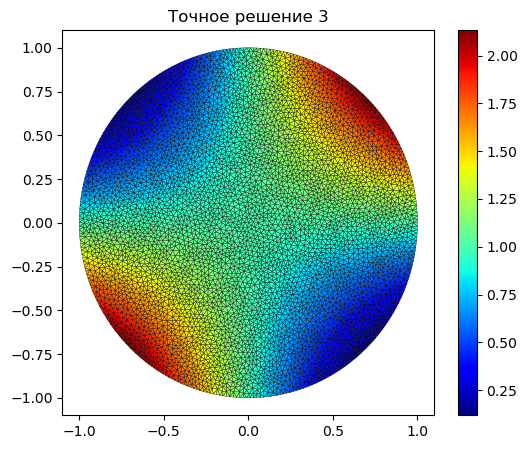

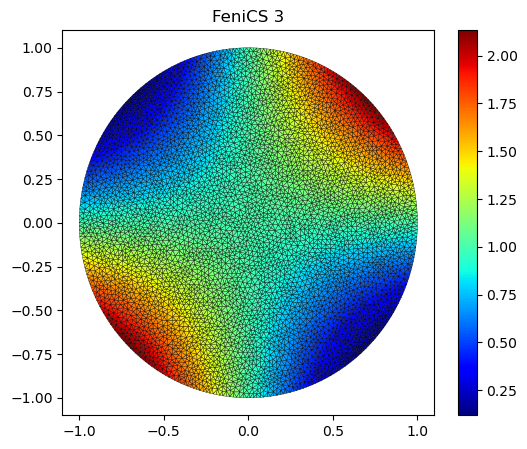

In [8]:
plot_sol(mesh, u_exact3, "Точное решение 3")
plot_sol(mesh, num_sol3, "FeniCS 3")

<h5> Часть 2. Задача для уравнения теплопроводности в круге.

Рассматривается краевая задача для неоднородного уравнения теплопроводности в круге: 
$$  \left( 2 \right)
    \begin{cases}
        \frac{\partial u}{\partial t} = a\Delta u + f(x, y, t), 0 < x^2 + y^2 < R^2,\\  
        u|_{\partial {\Omega}, x < 0} = h(x, y, t),\\
        \frac{\partial u}{\partial n} |_{\partial {\Omega}, x > 0} = g(x, y, t)\\ 
        u|_{t = 0} = u_0(x, y), 0 < x^2 + y^2 < R^2
        
    \end{cases}
$$  
где
$$ 
    \Omega = \left\{ \left( {x, y} \right): 0 < x^2 + y^2 < R^2 \right\} 
$$,  
$$
    \partial{\Omega} = \left\{ \left( {x, y} \right): x^2 + y^2 = R^2 \right\}
$$,  
$$
    \partial{\Omega} = \partial{\Omega_1} + \partial{\Omega_2} = \partial{\Omega}|_{x > 0} + \partial{\Omega}|_{x < 0}
$$,  
$$ 
    t \in \left[ 0, T \right]
$$

Предлагается строить решение поставленной задачи путем дискретизации уравнения по времени и использования на каждом временном шаге функции из части 1.

Сначала дискретизируем заданное уравнение по времени путем введения равномерной сетки $t_0 = 0 < t_1 < t_2 < ... < t_{N_t} = T$ с шагом по времени $h_t = \frac{T}{N_t}$.  
Обозначим $u^i = u(x, y, t_i)$ - значение функции $u(x, y, t)$ на шаге по времен $t_i$. Для численного дифференцирования по времени используется правая разностная производная. Тогда уравнение на $\left( i + 1 \right)$-м шаге приближенно можно записать как  
$$
    \frac{u^{i + 1} - u^i}{h_t} = \alpha \Delta u^{i + 1} + f^{i + 1} \: \text{     или     } \: u^{i + 1} - u^i = h_t \alpha \Delta u^{i + 1} + h_t f^{i + 1}
$$
Считаем, что на $\left( i + 1\right)$-м шаге значение $u^i(x, y, t_i)$ известно, $\alpha, f(x, y, t)$ - заданы, $\Delta$ - Лапласиан по пространственным координатам.

Аналогично алгортиму в части 1, сведем поставленную задачу к вариационному виду. На каждом временном шаге уравнение рассматривается в контексте представленных в части 1 пространствах $V, U$- тестовых и пробных функций. 

Исходное уравнение скалярно умножается на тестовую функцию $v \in V$ в обобщенном виде, применяются формулы векторного анализа и задачу удается свести к следующей вариационной постановке:  
$$ a(u^{i+1}, v)  = l(v), v \in V \\
a(u^{i+1}, v) =  h_t \alpha \int_{\Omega} \nabla u^{i+1} \nabla v dx + \int_{\Omega} u^{i+1}vdx\\  
l(v) = \int_{\Omega} u^i v dx + h_t\int_{\Omega} f^{i+1} v dx + h_t \alpha \int_{\partial{\Omega_1}} g^{i+1} v ds$$

Будем рассматривать задачу при $t \in \left[ 0, 10 \right]$ в единичном круге с центром в начале координат. Для дискретизации уравнения вариационной задачи на каждом временном шаге введем конечно-элементное функциональное пространство  $V_h = \left\{ v^h\left(r, \phi \right) \in C(\overline{\Omega}): v^h|_{e^i} = P_2(e^i) \right\}$.

In [9]:
#Триангуляция области
R = 1
circle = mshr.Circle(center_point, R)
mesh = mshr.generate_mesh(circle, 50)

#Временной промежуток
Nt = 1000
T = 10
time_grid = np.linspace(0, T, Nt)

# Функциональное пространство конечных элементов(скалярное)
function_space = dolfin.FunctionSpace(mesh, 'P', 2) #P = polinom, 2 - степень полинома
alpha = fenics.Constant(1)

Для проверки точности решения с помощью пакета FeniCS возьмем три пробных задачи. Построим три функции аналитического решения, далее по ним найдем функции $h(\phi), g(\phi)$, задающие краевые условия, и неоднороности уравнения $f(r, \phi)$.
$$  \left(\text{test 1} \right)        
    \begin{cases}
        u_{sol}(r, \phi, t) = r^2 {cos}^2 \phi + 3 r^2 {sin}^2 \phi + t^2\\
        f(r, \phi, t) = -8\alpha + 2t\\
        h(\phi, t) = R^2 \left[ {cos}^2\phi + 3 {sin}^2 \phi\right] + t^2, \phi \in  \left[ \frac {\pi}{2}, \frac{3 \pi}{2}\right)\\
        g(\phi, t) = 2R \left[ {cos}^2\phi + 3 {sin}^2 \phi\right], \phi \in \left[ 0, \frac{\pi}{2}\right) \cup\left[ \frac {3 \pi}{2}, 2 \pi\right)\\
        u_0(r, \phi) = r^2 {cos}^2 \phi + 3 r^2 {sin}^2 \phi \\
    \end{cases}
$$ 
$$  \left( \text{test 2} \right)        
    \begin{cases}
        u_{sol}(r, \phi, t) = t\:r cos \phi - r^2 {sin}^2 \phi + e^{-r\: cos\phi}\\
        f(r, \phi) = r cos \phi + 2\alpha - \alpha e^{-r \: cos \phi}\\
        h(\phi, t) = R cos \phi \: t - R^2 {sin}^2 \phi + e^{-R \: cos\phi}, \phi \in  \left[ \frac {\pi}{2}, \frac{3 \pi}{2}\right)\\
        g(\phi, t) = t cos \phi - 2R {sin}^2 \phi - e^{-R \: cos\phi}, \phi \in \left[ 0, \frac{\pi}{2}\right) \cup\left[ \frac {3 \pi}{2}, 2 \pi\right)\\
        u_0(r, \phi) = - r^2 {sin}^2 \phi + e^{-r\: cos\phi}\\
    \end{cases}
$$ 
$$  	\left( \text{test 3} \right)        
    \begin{cases}
        u_{sol}(r, \phi, t) = r^2 cos \phi sin \phi + e^{t r^2\: cos \phi\: sin \phi}\\
        f(r, \phi, t) = \left( r^2\: cos \phi\: sin \phi - \alpha t^2 r^2\right) e^{t\:r^2\: cos \phi\: sin \phi}\\
        h(\phi, t) = R^2 cos \phi sin \phi + e^{t\:R^2 \: cos \phi \: sin \phi}, \phi \in  \left[ \frac {\pi}{2}, \frac{3 \pi}{2}\right)\\
        g(\phi, t) = 2R\: cos \phi \: sin \phi \left[ 1 + te^{t\:R^2 \: cos \phi \: sin \phi}\right], \phi \in \left[ 0, \frac{\pi}{2}\right) \cup\left[ \frac {3 \pi}{2}, 2 \pi\right)\\
        u_0(r, \phi) = 1 + r^2 cos \phi sin \phi\\
    \end{cases}
$$ 

In [12]:
#Инициализация данных для трех тестовых задач. R = 1, alpha = 1
t0 = fenics.Expression("0.0", degree = 2)

u_exact1 = fenics.Expression("r * r * cos(phi) * cos(phi) + 3 * r * r * sin(phi) * sin(phi) + t * t", r = r, phi = phi, t = t0, degree = 2)
f1 = fenics.Expression("-8 + 2 * t ", t = t0, degree = 2)
h1 = fenics.Expression("cos(phi) * cos(phi) + 3 * sin(phi) * sin(phi) + t * t", t = t0, phi = phi, degree = 2)
g1 = fenics.Expression("2 * (cos(phi) * cos(phi) + 3 * sin(phi) * sin(phi))", phi = phi, degree = 2)
u01 = fenics.Expression("r * r * cos(phi) * cos(phi) + 3 * r * r * sin(phi) * sin(phi)", r = r, phi = phi, degree = 2)


u_exact2 = fenics.Expression("r * cos(phi) * t - r * r * sin(phi) * sin(phi) + exp(-(r * cos(phi)))", t = t0, r = r, phi = phi, degree = 2)
f2 = fenics.Expression("r * cos(phi) + 2 - exp(- r * cos(phi))", r = r, phi = phi, degree = 2)
h2 = fenics.Expression("cos(phi) * t - sin(phi) * sin(phi) +  exp(-cos(phi))", t = t0, phi = phi, degree = 2)
g2 = fenics.Expression("cos(phi) * t - 2 * sin(phi) * sin(phi) -  exp(- cos(phi))", t = t0, phi = phi, degree = 2)
u02 = fenics.Expression(" - r * r * sin(phi) * sin(phi) + exp(-(r * cos(phi)))", r = r, phi = phi, degree = 2)


u_exact3 = fenics.Expression("r * r * sin(phi) * cos(phi) + exp(t * r * r * cos(phi) * sin(phi))", t = t0, r = r, phi = phi, degree = 2)
f3 = fenics.Expression("(r * r * cos(phi) * sin(phi) - t * t * r * r) * exp(t * r * r * cos(phi) * sin(phi))", t = t0, r = r, phi = phi, degree = 2)
h3 = fenics.Expression("sin(phi) * cos(phi) + exp(t * cos(phi) * sin(phi))", t = t0, phi = phi, degree = 2)
g3 = fenics.Expression("2 * sin(phi) * cos(phi) * (1.0 + t * exp(t * cos(phi) * sin(phi)))", t = t0, phi = phi, degree = 2)
u03 = fenics.Expression("r * r * sin(phi) * cos(phi) ", r = r, phi = phi, degree = 2)